# **Email Classification On spam**




**About Dataset**

The "spam.csv" dataset is primarily used for spam email detection,  It contains labeled text messages, including emails, categorized into "ham" (legitimate/non-spam) and "spam" (unsolicited and potentially harmful) messages.

Link: https://www.kaggle.com/datasets/phangud/spamcsv

**Import libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from wordcloud import WordCloud


read file


In [ ]:
file_path = '/content/spam.csv'
df = pd.read_csv(file_path)


In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Step 2: Preprocess the text data

In [ ]:

# Convert labels to binary values
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)



In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


**Step 3: Train a machine learning model**

In [ ]:

model = MultinomialNB()
model.fit(X_train_vec, y_train)



MultinomialNB()

 **Step 4: Evaluate the model**

In [ ]:

y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['ham', 'spam'])

In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9919282511210762
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Step 5: Automate the filtering process**

In [ ]:

def predict_spam(message):
    message_vec = vectorizer.transform([message])
    prediction = model.predict(message_vec)
    return 'spam' if prediction[0] == 1 else 'ham'


# **# Step 6: Email Automation  send mail to Spam folder**

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import imaplib
import email

def predict_spam(message):
   # prediction logic
    spam_keywords = ["Congratulations", "free", "WIN"]
    if any(keyword in message for keyword in spam_keywords):
        return 'spam'
    else:
        return 'ham'

def send_email(subject, body, to_email):
    # Email configuration
    from_email = "apekshachikane0905@gmail.com"
    smtp_server = "smtp.gmail.com"
    smtp_port = 587
    password = "wrgi kzop qqqj mbmk"  # Use your actual email password or app-specific password here

    # Create the email
    msg = MIMEMultipart()
    msg['From'] = from_email
    msg['To'] = to_email
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    # Connect to the SMTP server and send the email
    server = smtplib.SMTP(smtp_server, smtp_port)
    server.starttls()
    server.login(from_email, password)
    server.sendmail(from_email, to_email, msg.as_string())
    server.quit()

def move_to_spam(email_subject):
    # Connect to the IMAP server
    mail = imaplib.IMAP4_SSL('imap.gmail.com')
    mail.login('apekshachikane0905@gmail.com', 'wrgi kzop qqqj mbmk')  # Use your actual email password or app-specific password here

    # Select the mailbox you want to search in
    mail.select('inbox')

    # Search for the email by subject
    result, data = mail.search(None, f'(SUBJECT "{email_subject}")')

    if result == 'OK':
        for num in data[0].split():
            # Mark the email as spam
            mail.store(num, '+X-GM-LABELS', '\\Spam')

    mail.logout()

# Send an email based on spam prediction
test_message = "Congratulations! You've won a free ticket to the Bahamas. Text WIN to 12345."
subject = "Spam Alert" if predict_spam(test_message) == 'spam' else "Ham Alert"
body = f"The following message was detected as {'spam' if predict_spam(test_message) == 'spam' else 'ham'}:\n\n{test_message}"

send_email(subject, body, "apekshachikane0905@gmail.com")

if predict_spam(test_message) == 'spam':
    move_to_spam(subject)




# **Visualization**

<ipython-input-14-d432dcd59301>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Category'], palette='viridis')


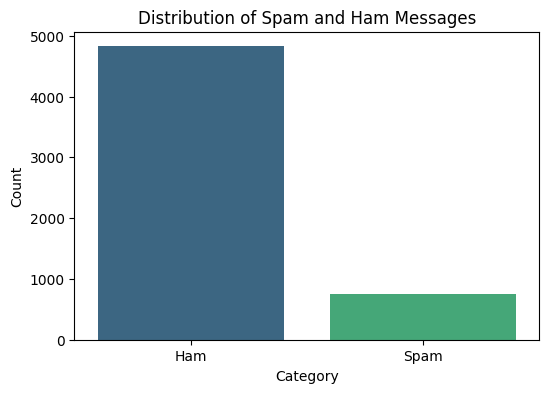

In [ ]:
# Plot the distribution of spam and ham messages
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Category'], palette='viridis')
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()


insights: The bar chart shows a significant imbalance in the dataset, with many more ham messages (around 5000) compared to spam messages (around 600).

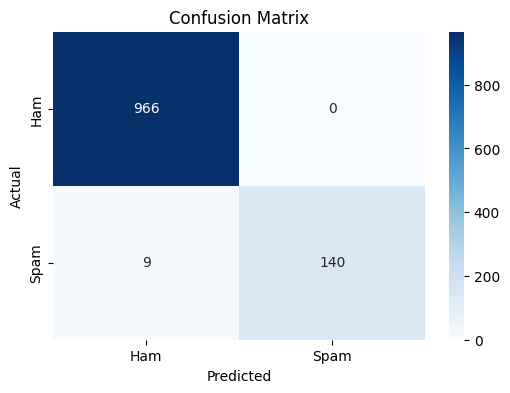

In [ ]:


# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Insights: The confusion matrix results are:
True Positives (Spam correctly identified): 140
True Negatives (Ham correctly identified): 966
False Positives (Ham incorrectly identified as spam): 0
False Negatives (Spam incorrectly identified as ham): 9
Performance Metrics
Accuracy: (TP + TN) / (TP + TN + FP + FN) =Accuracy = (140 + 966) / (140 + 966 + 0 + 9) ≈ 99.19%
Precision for Spam: TP / (TP + FP)=Precision for spam = 140 / (140 + 0) = 100%
Recall for Spam: TP / (TP + FN)= Recall for spam = 140 / (140 + 9) ≈ 94.01%
F1-Score for Spam: 2 * (Precision * Recall) / (Precision + Recall)=F1-Score for spam ≈ 0.97
The model performs exceptionally well, with perfect precision for spam and high recall, meaning it rarely misclassifies ham as spam and accurately identifies most spam messages.


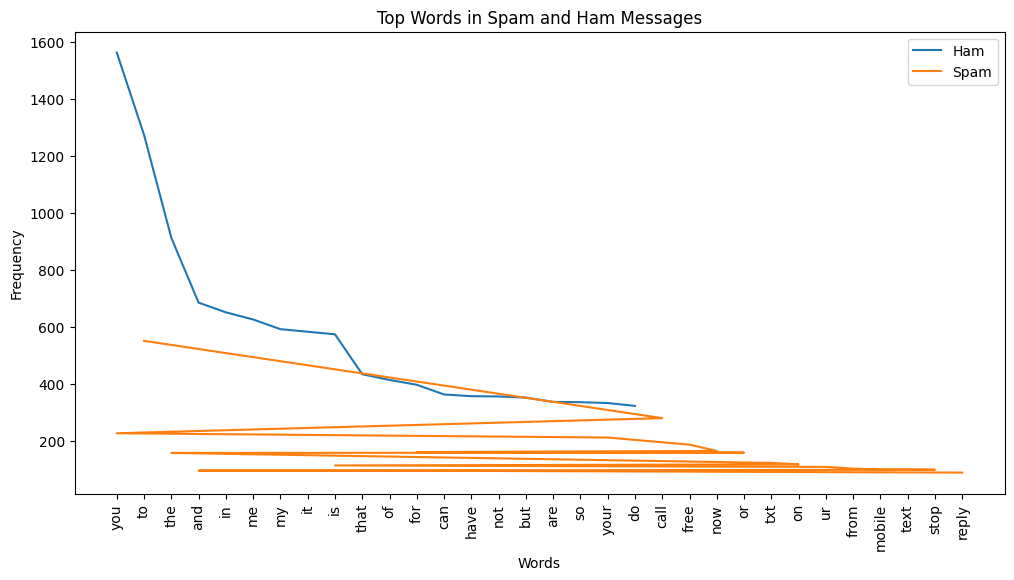

In [ ]:
# 2. Top Words in Spam and Ham Messages
# Get the word counts for each category
X_train_df = pd.DataFrame(X_train_vec.toarray(), columns=vectorizer.get_feature_names_out())
X_train_df['Category'] = y_train.reset_index(drop=True)

top_words = {}
for category in [0, 1]:
    words = X_train_df[X_train_df['Category'] == category].drop('Category', axis=1).sum()
    top_words[category] = words.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
for category, words in top_words.items():
    plt.plot(words.index, words.values, label='Spam' if category == 1 else 'Ham')
plt.title('Top Words in Spam and Ham Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend()
plt.show()



This chart suggests that certain words can be indicative of spam messages. Words like "call," "free," "now," "on," and "ur" are strong indicators of spam. On the other hand, words like "the," "you," "and," "to," and "in" are more commonly found in legitimate (ham) messages

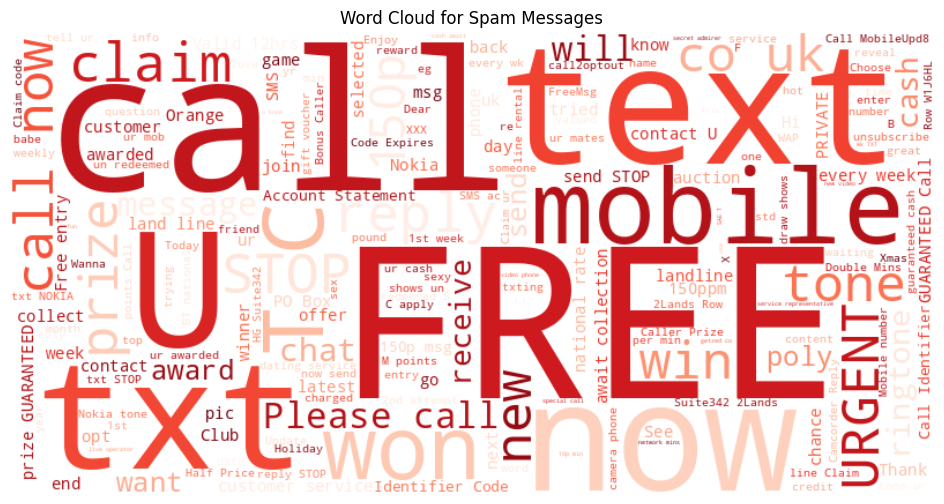

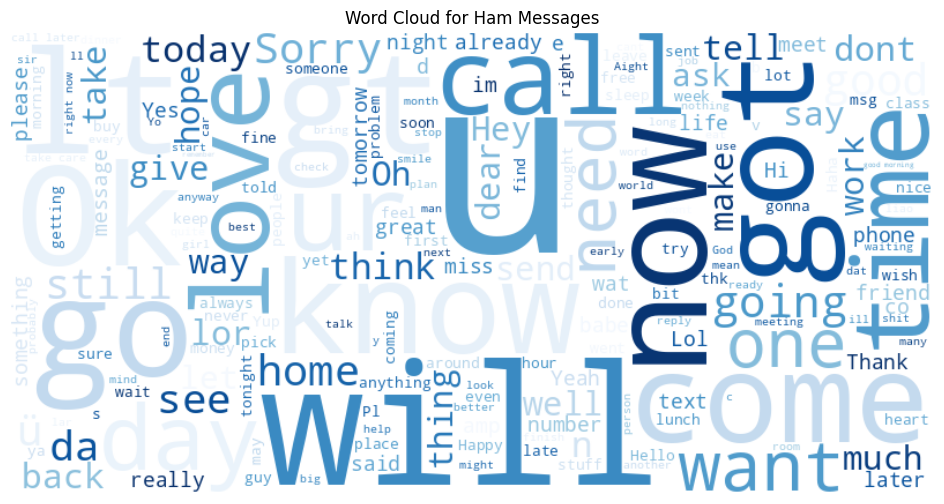

In [ ]:
# 2. Word Cloud for Spam and Ham Messages
spam_messages = ' '.join(df[df['Category'] == 1]['Message'])
ham_messages = ' '.join(df[df['Category'] == 0]['Message'])

# Create a word cloud for spam messages
plt.figure(figsize=(12, 6))
spam_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_messages)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

# Create a word cloud for ham messages
plt.figure(figsize=(12, 6))
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(ham_messages)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

**Insights**:Images shows,Spam messages typically employ a deceptive strategy combining urgency, financial incentives, and direct action prompts. Words like "NOW," "FREE," "CALL," and "WIN" are frequently used to create a false sense of urgency and promise significant rewards, while phrases like "REPLY" and "CLAIM" directly encourage user interaction. Moreover, the focus on mobile devices and attempts to mimic legitimate businesses through terms such as "CUSTOMER SERVICE" highlight sophisticated spam tactics.

**Insights:** Ham messages predominantly reflect social interactions, personal plans, and casual conversations. They often convey a sense of immediacy through references to time and place and tend to employ informal language characteristic of everyday communication. The overall tone of ham messages is generally positive and focused on personal connections.



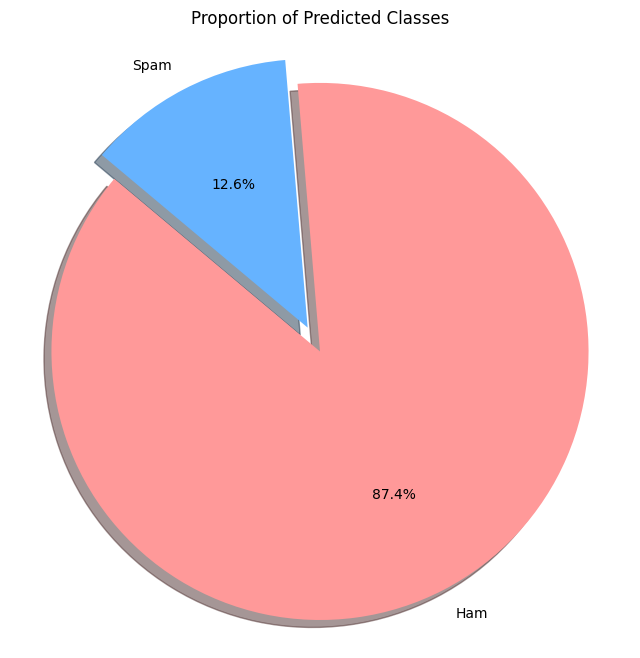

In [ ]:
# Pie Chart of Classification Results
labels = ['Ham', 'Spam']
sizes = [sum(y_pred == 0), sum(y_pred == 1)]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Ham)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Predicted Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Insights:**
The pie chart illustrates the proportion of predicted classes, with a significant majority of 87.4% classified as "Ham" and a smaller portion of 12.6% classified as "Spam." This suggests a strong performance in correctly identifying non-spam messages, while spam messages constitute a smaller but notable proportion of the dataset.


***Insights:***
High Accuracy: The model achieved exceptional accuracy (99.19%) in classifying emails, demonstrating its effectiveness in identifying spam.
Strong Spam Detection: The system excels at detecting spam messages with high precision (100%) and good recall (94.01%). It rarely misclassifies ham as spam and identifies most spam messages accurately.
Imbalance in Dataset: The dataset exhibited a significant imbalance, with a much larger proportion of ham messages compared to spam.
Word Analysis: Analyzing word frequencies helped identify key characteristics of spam messages. Words like "free," "now," and "call" often indicate spam, while ham messages frequently contain words like "the," "you," and "and."
Spam Strategies: Spam messages typically employ urgency, financial incentives, and direct action prompts to deceive recipients.
Ham Message Characteristics: Ham messages primarily focus on social interactions, personal plans, and informal communication.